In [12]:
import matplotlib as plt 
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets_df = pd.read_csv('twitter_archive_master.csv',index_col=0)
images_pred_df = pd.read_csv('clean_images_pred.csv',index_col=0)

After I I went through `@dog_rate` twitter account, now I'll do some visualization and highlighting insights,
`@dog_rate` is twitter account for rateing dogs, we extracted data from it and I'm intresetd to know the distribution of retweet and favorite for tweets 

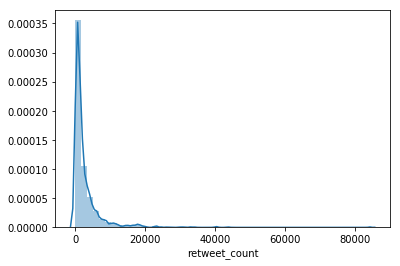

In [13]:
sns.distplot(tweets_df.retweet_count)

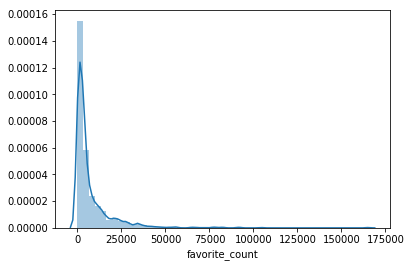

In [14]:
sns.distplot(tweets_df.favorite_count)

Sounds good, What about rating distribution?

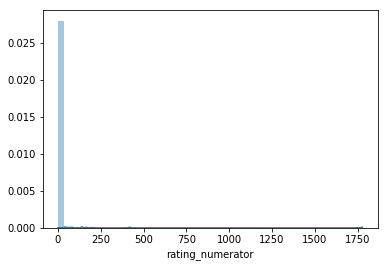

In [15]:
sns.distplot(tweets_df.rating_numerator)

There is a problem with this chart as when we we close to zero there is outlier, let's remove numbers less than 50 

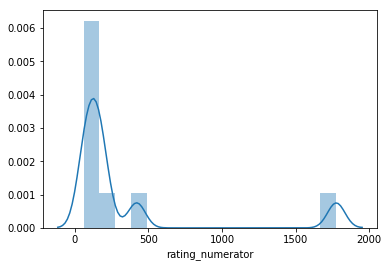

In [16]:
sns.distplot(tweets_df[tweets_df.rating_numerator > 50].rating_numerator)

from above charts we can say in general that more likely to a tweet to get less 100 rate, retweets and favorites

let's look on something else interesting, is the number of  retweet more or the number of favorite?

In [11]:
# sum of favorite
print('number of favorites is ' + str(tweets_df.favorite_count.sum()))

number of favorites is 9894793


In [10]:
# sum of retweet
print('number of retweets is ' + str(tweets_df.retweet_count.sum()))

number of retweets is 3654058


we can say the number of favorite more than the number of retweet in general, I guess if you someone made a retweet he would be interested to know how many retweet that tweet get, plus those whom just like the dog itself. 

finally let's find is there a linear correlation between these variables, so we can in futuer predect the rateing based on the retweets and favorites 

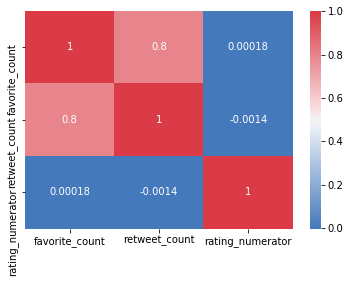

In [12]:
corr = tweets_df[['favorite_count','retweet_count','rating_numerator']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(250, 10, as_cmap=True), annot=True)

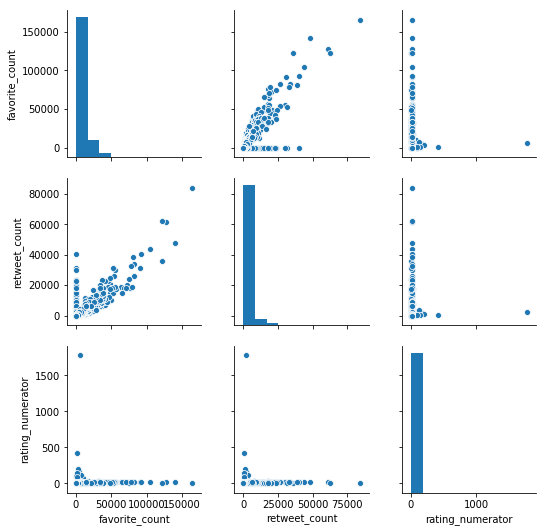

In [13]:
sns.pairplot(tweets_df[['favorite_count','retweet_count','rating_numerator']])

From these chart above there is clear a linear correlation between `favorite_count` and `retweet_count` with correlation coefficient of 0.8, unlike `rating_numerator`, it makes scene, but we can't predect with correlation at least with linear models. 